newt_eq=array([0.        , 0.07538182, 0.30152729, 0.67843639, 1.20610915,
       1.88454554, 2.71374558, 3.69370926, 4.82443658, 6.10592755])
rel_eq=array([0.        , 0.07052298, 0.24356899, 0.46614978, 0.71151939,
       0.9683878 , 1.23168001, 1.49887406, 1.76859882, 2.04005196])
p_vals_data=array([0.9375, 1.1875, 1.42  , 1.5625, 1.79  ])
+- s_p_vals=array([0.1, 0.1, 0.1, 0.1, 0.1])
k_vals=array([0.512096, 0.7386  , 0.974952, 1.152216, 1.349176])
+- s_k=array([0.00984814, 0.00984829, 0.01969625, 0.01969635, 0.01969648])


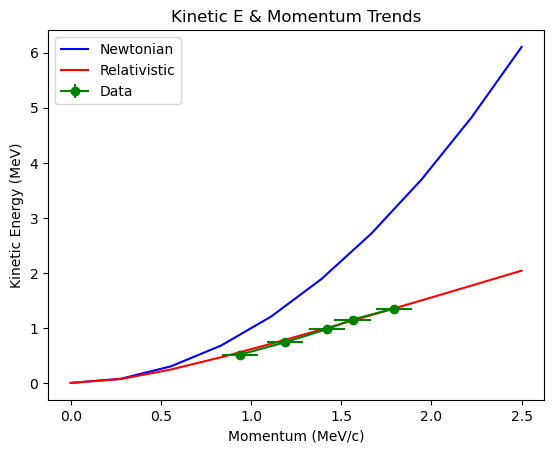

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# analysis #3 graph newtonian and relativistic plots like figure 3 from the handout


p_vals = np.linspace(0,2.5,10) # in MeV/c

m = 9.11e-31 # in kg
c = 3e8 # in m/s


mev_to_j = 1.602e-13 # converts to J
p_vals*=(mev_to_j/c) # converted to kg*m/s
# K = (mv^2)/2 = p^2/(2m)
newt_eq = (p_vals**2)/(2*m) # in J
#newt_eq/=(mev_to_j*c**2) # convert to MeV


# K = E - mc^2 with E^2 = (mc^2)^2+(pc^2)
# K = (sqrt(mc^2)^2+(pc^2))-mc^2

rel_eq = np.sqrt((m*c**2)**2+(p_vals*c)**2)-(m*c**2) # should be in J

# convert to desired units
p_vals/=(mev_to_j/c) # convert to MeV/c
rel_eq/=mev_to_j  # convert to MeV
newt_eq/=mev_to_j # convert to MeV

print(f'{newt_eq=}')
print(f'{rel_eq=}')
'''
plt.plot(p_vals,newt_eq, 'b',label='Newtonian')
plt.plot(p_vals,rel_eq,'r',label='Relativistic')
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Kinetic Energy (MeV)')
plt.title('Newtonian vs Relativistic Predictions')
#plt.ylim(0,5)
plt.legend()
plt.savefig('plot_blank.png')
'''
d_vals = np.array([5.25,6.4,7.5,8.25,9.5])
s_d_vals = np.full(len(d_vals),0.02)

roi_vals = np.array([52,75,99,117,137])
s_roi_vals = np.array([1,1,2,2,2])

p_vals_data = np.array([0.9375,1.1875,1.42,1.5625,1.79]) # in MeV/c
s_p_vals = s_d_vals*5

k_num = 0.009848 # in MeV
s_k_num = 0.000001

k_vals = k_num*roi_vals

## various uncertainties calculated separately 
## then we sum these in quadrature

s_k_vals_roi_low = k_num*(roi_vals-s_roi_vals)
s_k_vals_roi_high = k_num*(roi_vals+s_roi_vals)
s_k_vals_roi = (np.abs(s_k_vals_roi_low-k_vals)+np.abs(s_k_vals_roi_high-k_vals))/2

s_k_vals_k_low = (k_num-s_k_num)*(roi_vals)
s_k_vals_k_high = (k_num+s_k_num)*(roi_vals)
s_k_vals_k = (np.abs(s_k_vals_k_low-k_vals)+np.abs(s_k_vals_k_high-k_vals))/2

s_k = np.sqrt(s_k_vals_roi**2+s_k_vals_k**2)

print(f'{p_vals_data=}')
print(f'+- {s_p_vals=}')
print(f'{k_vals=}')
print(f'+- {s_k=}')

# now plot the points on the graph 
plt.plot(p_vals,newt_eq, 'b',label='Newtonian')
plt.plot(p_vals,rel_eq,'r',label='Relativistic')
#plt.ylim(0,5)
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('Kinetic Energy (MeV)')
plt.title('Kinetic E & Momentum Trends')
plt.errorbar(p_vals_data, k_vals,yerr=s_k,xerr=s_p_vals,fmt='go-',label='Data')
plt.legend()
plt.savefig('plot_filled.png')
